In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mplt
import random
from math import *
import sklearn as svm
import seaborn as sns
%matplotlib inline
import pickle
from sklearn.svm import SVC
import plotly.express as px

# **Analysis of the Fifa world cup 2022**

# **1. Pre data analysis**

Importing the file and checking critical data like: description, info etc. Checking also the head and tail of the file

In [3]:
data = pd.read_excel("/content/Project3 Data 2022-FIFA-World-Cup-Performance-Sample-Data.xlsx")
print(data.head())

         Player Name  Position  Jersey Number Player DOB            Club   \
0    Nicolas Otamendi       DF             19 1989-07-13          Benfica   
1        Marcos Acuna       DF              8 1991-03-16          Sevilla   
2  Nicolas Tagliafico       DF              3 1991-05-06             Lyon   
3     German Pezzella       DF              6 1991-02-25       Real Betis   
4       Nahuel Molina       DF             26 1998-02-11  Atletico Madrid   

    Appearances  Goals Scored   Assists Provided   Dribbles per 90 Min  \
0             7              0                  1                 0.33   
1             6              0                  0                 1.45   
2             6              0                  0                 0.48   
3             3              0                  0                 0.00   
4             7              1                  1                 0.32   

   Interceptions per 90 Min  Tackles per 90 Min  Total Duels Won per 90 Min  
0             

In [4]:
dataframe = pd.DataFrame(data)
print(dataframe.head())

         Player Name  Position  Jersey Number Player DOB            Club   \
0    Nicolas Otamendi       DF             19 1989-07-13          Benfica   
1        Marcos Acuna       DF              8 1991-03-16          Sevilla   
2  Nicolas Tagliafico       DF              3 1991-05-06             Lyon   
3     German Pezzella       DF              6 1991-02-25       Real Betis   
4       Nahuel Molina       DF             26 1998-02-11  Atletico Madrid   

    Appearances  Goals Scored   Assists Provided   Dribbles per 90 Min  \
0             7              0                  1                 0.33   
1             6              0                  0                 1.45   
2             6              0                  0                 0.48   
3             3              0                  0                 0.00   
4             7              1                  1                 0.32   

   Interceptions per 90 Min  Tackles per 90 Min  Total Duels Won per 90 Min  
0             

Getting rid of all the Nan values and deleting those values.

In [9]:
dataframe = dataframe.dropna()
print(dataframe.head())

         Player Name  Position  Jersey Number Player DOB            Club   \
0    Nicolas Otamendi       DF             19 1989-07-13          Benfica   
1        Marcos Acuna       DF              8 1991-03-16          Sevilla   
2  Nicolas Tagliafico       DF              3 1991-05-06             Lyon   
3     German Pezzella       DF              6 1991-02-25       Real Betis   
4       Nahuel Molina       DF             26 1998-02-11  Atletico Madrid   

    Appearances  Goals Scored   Assists Provided   Dribbles per 90 Min  \
0             7              0                  1                 0.33   
1             6              0                  0                 1.45   
2             6              0                  0                 0.48   
3             3              0                  0                 0.00   
4             7              1                  1                 0.32   

   Interceptions per 90 Min  Tackles per 90 Min  Total Duels Won per 90 Min  
0             

In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Player Name                 26 non-null     object        
 1   Position                    26 non-null     object        
 2   Jersey Number               26 non-null     int64         
 3   Player DOB                  26 non-null     datetime64[ns]
 4   Club                        26 non-null     object        
 5    Appearances                26 non-null     int64         
 6   Goals Scored                26 non-null     int64         
 7   Assists Provided            26 non-null     int64         
 8   Dribbles per 90 Min         26 non-null     float64       
 9   Interceptions per 90 Min    26 non-null     float64       
 10  Tackles per 90 Min          26 non-null     float64       
 11  Total Duels Won per 90 Min  26 non-null     float64       
d

In [13]:
dataframe.describe()

,Jersey Number,Player DOB,Appearances,Goals Scored,Assists Provided,Dribbles per 90 Min,Interceptions per 90 Min,Tackles per 90 Min,Total Duels Won per 90 Min
count,26.000000,26,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,13.500000,1994-09-22 19:23:04.615384576,4.346154,0.576923,0.307692,1.004231,0.578077,1.223077,4.320769
min,1.000000,1987-01-13 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.250000,1991-04-15 18:00:00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.882500
50%,13.500000,1994-02-25 00:00:00,5.000000,0.000000,0.000000,0.365000,0.425000,1.115000,5.080000
75%,19.750000,1998-03-31 00:00:00,7.000000,0.000000,0.000000,0.822500,0.815000,1.765000,7.057500
max,26.000000,2001-03-26 00:00:00,7.000000,7.000000,3.000000,6.830000,3.830000,4.020000,9.240000
std,7.648529,NaN,2.575924,1.553656,0.679366,1.746451,0.851328,1.207645,3.174002


In [12]:
columns = dataframe.columns
print(columns)

Index(['Player Name ', 'Position', 'Jersey Number', 'Player DOB', 'Club ',
       ' Appearances', 'Goals Scored ', 'Assists Provided ',
       'Dribbles per 90 Min', 'Interceptions per 90 Min', 'Tackles per 90 Min',
       'Total Duels Won per 90 Min'],
      dtype='object')


**Using seaborn we are going to see how data looks compared to each other**

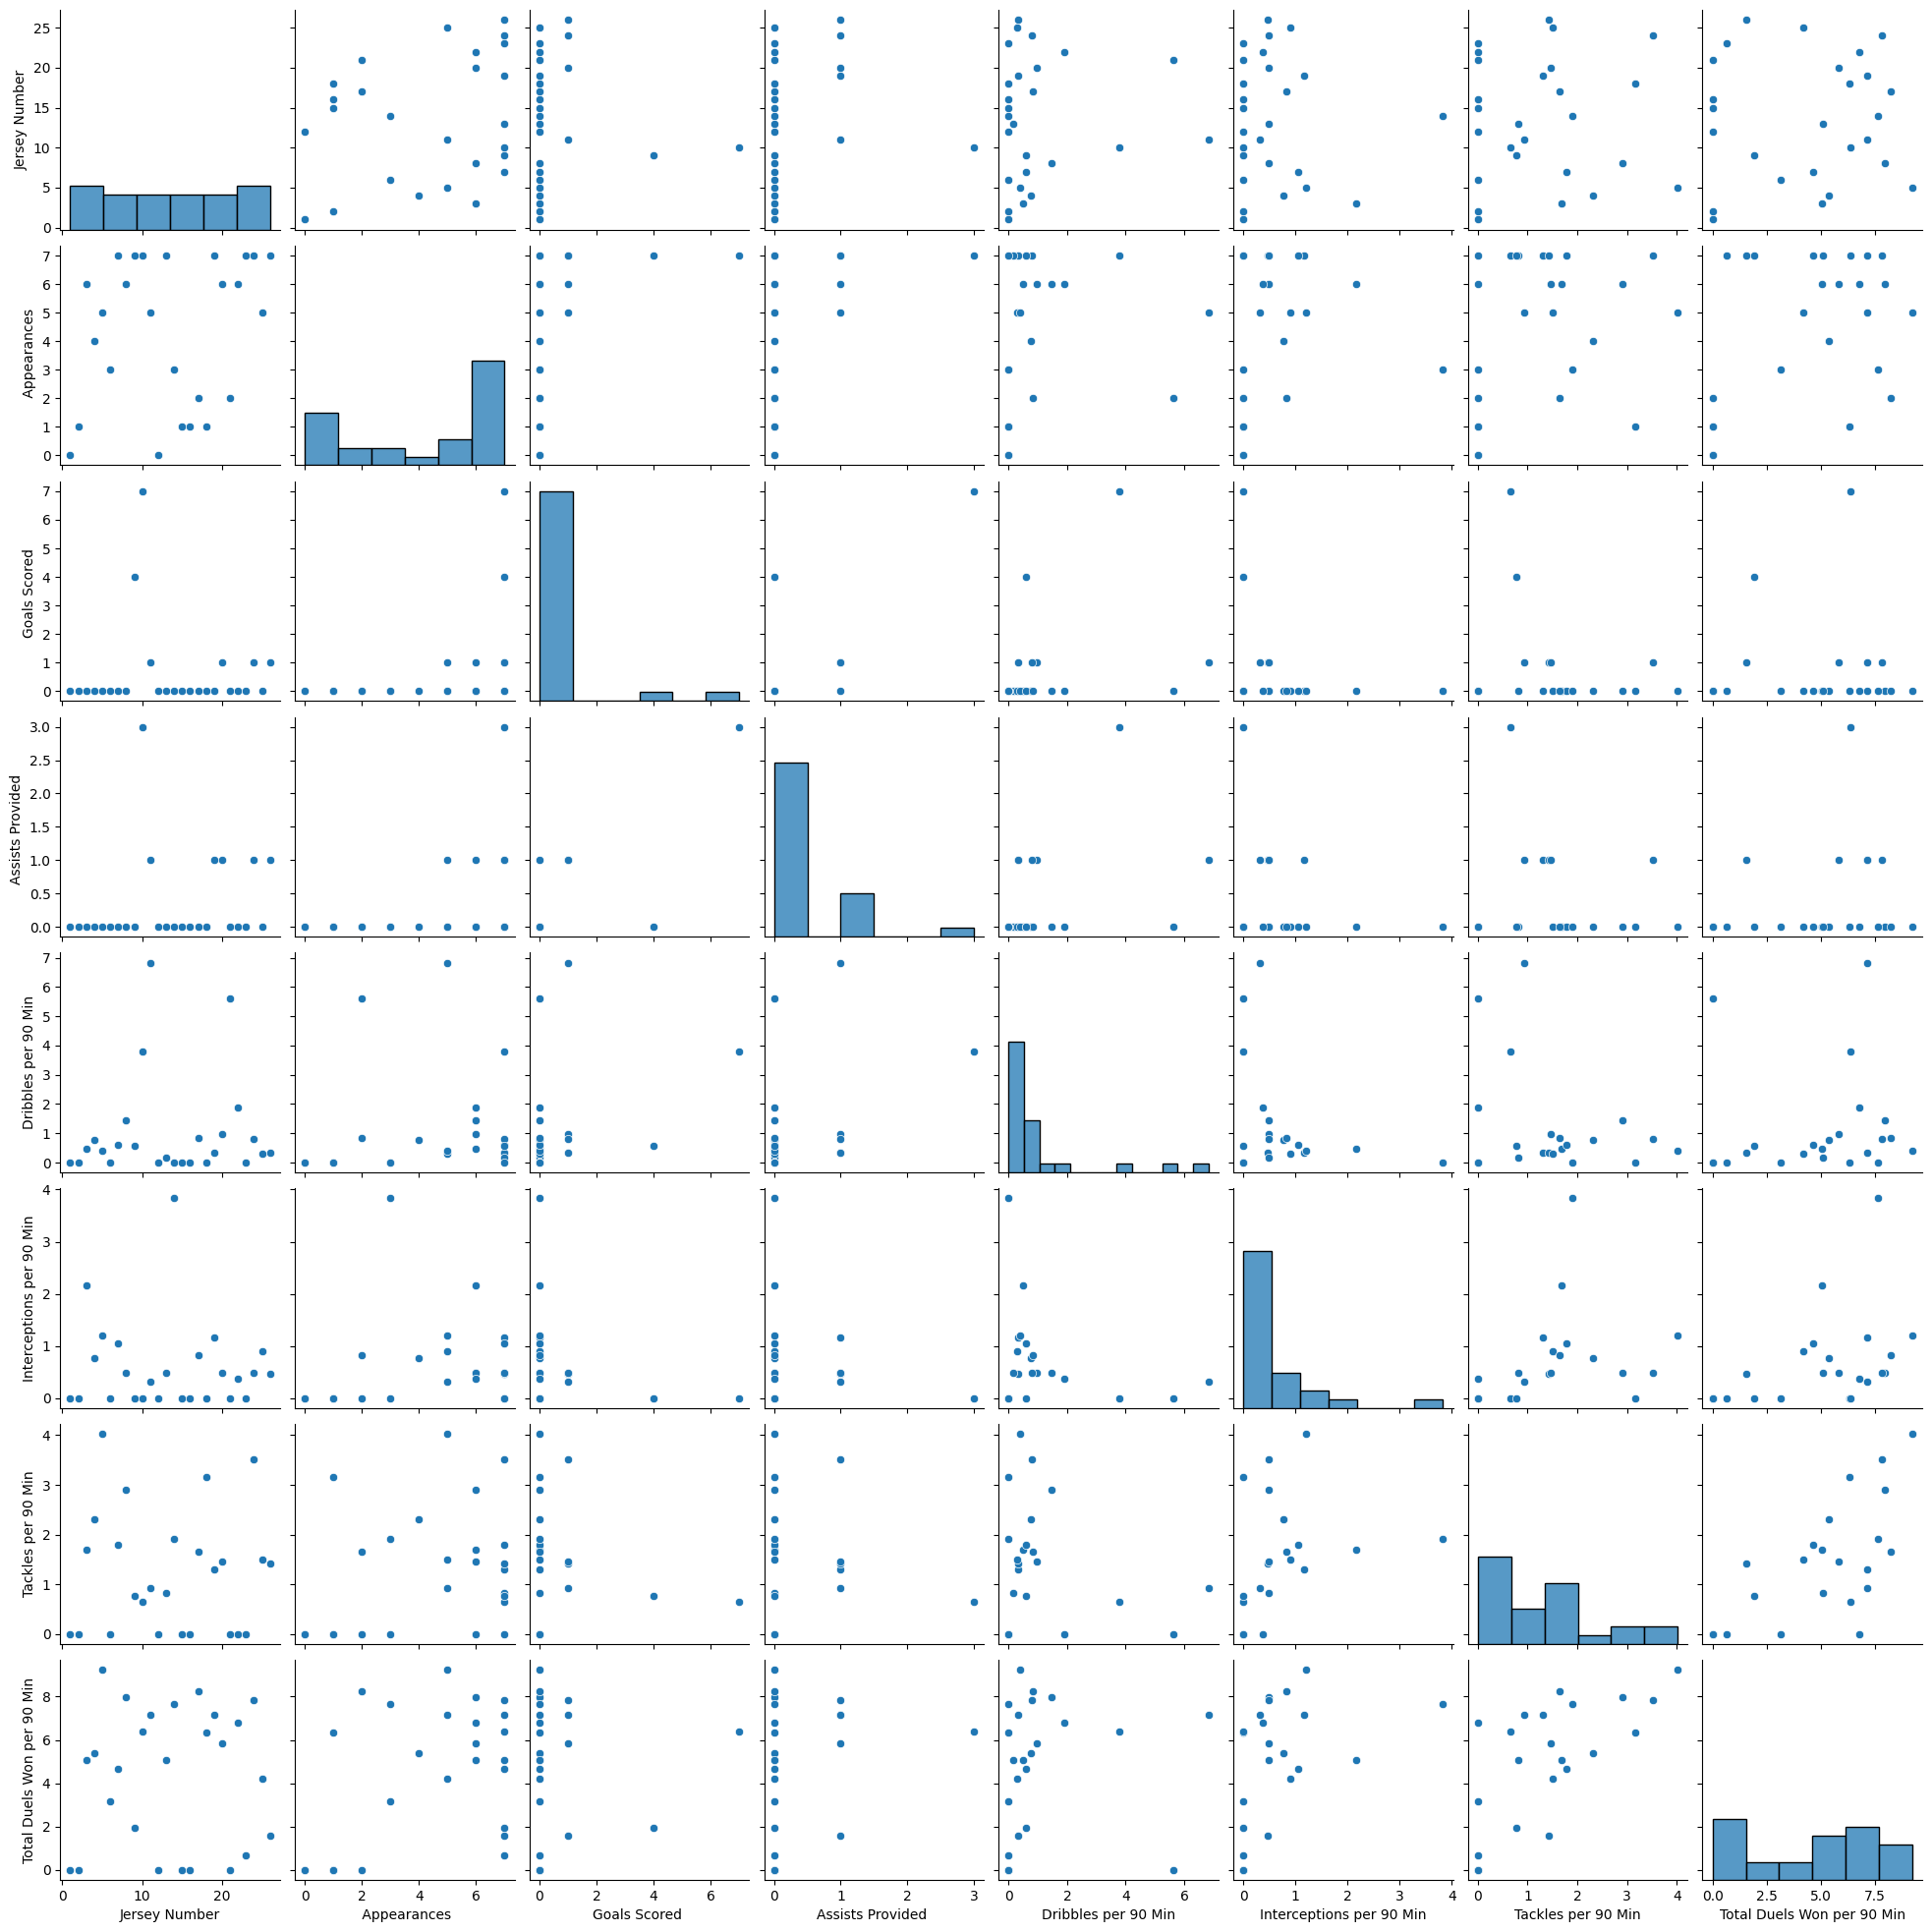

In [ ]:
sns.pairplot(dataframe)

# 2. Detailed analysis of chosen values.

Lets see again what columns we have to compare some data

In [14]:
columns = dataframe.columns
print(columns)

Index(['Player Name ', 'Position', 'Jersey Number', 'Player DOB', 'Club ',
       ' Appearances', 'Goals Scored ', 'Assists Provided ',
       'Dribbles per 90 Min', 'Interceptions per 90 Min', 'Tackles per 90 Min',
       'Total Duels Won per 90 Min'],
      dtype='object')


**2.1 Player name vs goals scored.**

**Matplotlib line plot**

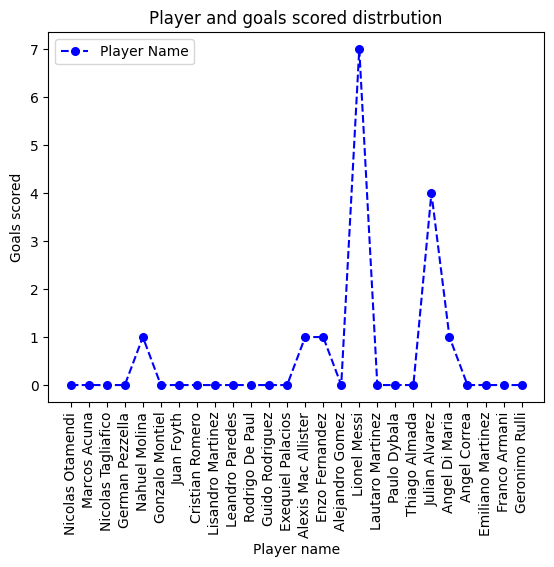

In [15]:
player = dataframe['Player Name ']
goals = dataframe['Goals Scored ']

plt.plot(player, goals, color = "blue", label = "Player Name", linestyle = "--", marker = ".", markersize = 11)
plt.xticks(rotation = 90)
plt.title("Player and goals scored distrbution")
plt.xlabel("Player name")
plt.ylabel("Goals scored")
plt.legend(loc = "upper left")
plt.show()

**Plotly line plot**

In [20]:
px.line(dataframe, x = "Player Name ", y = "Goals Scored ", title = "Player and goals scored distrbution")

**2.2 Position on the pitch vs goals scored**

**Matplotlib**

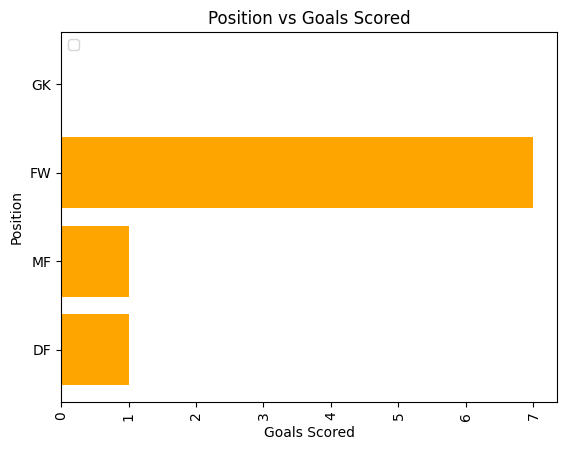

In [21]:
# postion and goals scored
position = dataframe['Position']
goals_scored = dataframe['Goals Scored ']

plt.barh(position, goals_scored, color = "orange")
plt.xticks(rotation = 90)
plt.xlabel('Goals Scored')
plt.ylabel('Position')
plt.title('Position vs Goals Scored')
plt.legend(loc = "upper left")
plt.show()

**Plotly**

In [22]:
px.bar(dataframe, x = "Position", y = "Goals Scored ", title = "Position vs Goals Scored")

Lets check again what columns we have to see what comparisons we can make

In [23]:
columns = dataframe.columns
print(columns)

Index(['Player Name ', 'Position', 'Jersey Number', 'Player DOB', 'Club ',
       ' Appearances', 'Goals Scored ', 'Assists Provided ',
       'Dribbles per 90 Min', 'Interceptions per 90 Min', 'Tackles per 90 Min',
       'Total Duels Won per 90 Min'],
      dtype='object')


**2.3 Lets see if postion has some correlation between interceptions and tackles**

**Matplotlib**

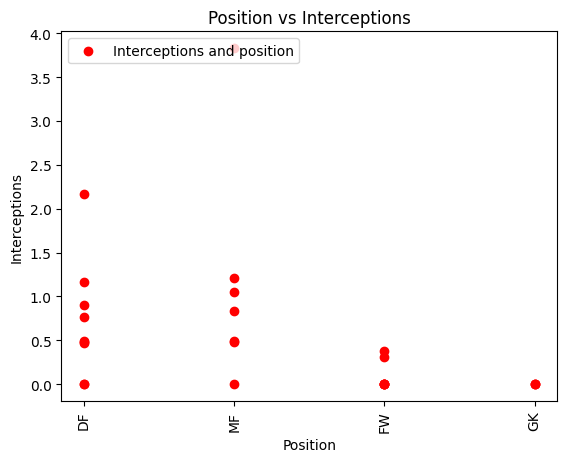

Text(0.5, 1.0, 'Tackles vs Position')

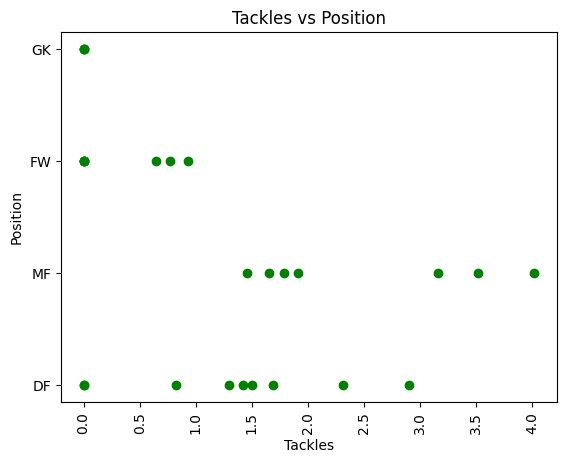

In [24]:
interceptions = dataframe['Interceptions per 90 Min']
tackles = dataframe['Tackles per 90 Min']
position = dataframe['Position']

#plot 1: interceptions and postion

plt.scatter(position, interceptions, color = "red", label = "Interceptions and position")
plt.xticks(rotation = 90)
plt.xlabel('Position')
plt.ylabel('Interceptions')
plt.title('Position vs Interceptions')
plt.legend(loc = "upper left")
plt.show()


# plot 2: interceptions and tackles

plt.scatter(tackles, position, color = "green", label = "Position and tackles")
plt.xticks(rotation = 90)
plt.xlabel('Tackles')
plt.ylabel('Position')
plt.title('Tackles vs Position')

**Plotly**

**Position vs interceptions**

In [25]:
px.scatter(dataframe, x = "Position", y = "Interceptions per 90 Min", title = "Position vs Interceptions")

**Position vs tackles**

In [26]:
px.scatter(dataframe, x = "Position", y = "Tackles per 90 Min", title = "Position vs Tackles")

Lets check again all the columns we have and all plots we can plot

In [27]:
columns = dataframe.columns
print(columns)

Index(['Player Name ', 'Position', 'Jersey Number', 'Player DOB', 'Club ',
       ' Appearances', 'Goals Scored ', 'Assists Provided ',
       'Dribbles per 90 Min', 'Interceptions per 90 Min', 'Tackles per 90 Min',
       'Total Duels Won per 90 Min'],
      dtype='object')


**2.4 Jersey number vs assists provided. Is the "10" really an assist provider?A bar char will do the job here**

**Matplotlib**

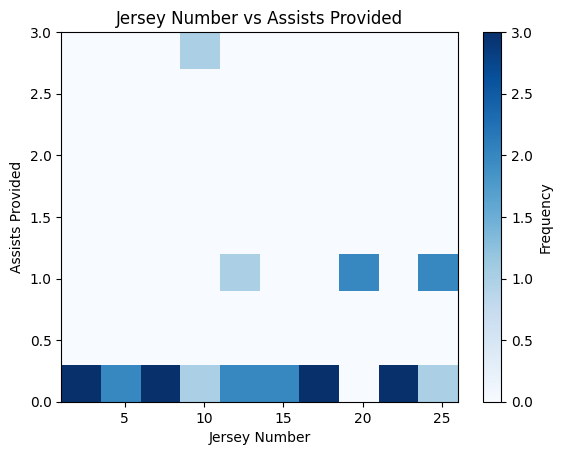

In [35]:
jersey_number = dataframe['Jersey Number']
assists_provided = dataframe['Assists Provided ']

plt.hist2d(jersey_number, assists_provided, bins=10, cmap='Blues')
plt.colorbar(label='Frequency')
plt.xlabel('Jersey Number')
plt.ylabel('Assists Provided')
plt.title('Jersey Number vs Assists Provided')
plt.show()

**Plotly**

In [40]:
fig = px.histogram(dataframe, x="Jersey Number", y="Assists Provided ",
                   title="Jersey Number vs Assists Provided",
                   histfunc="sum",
                   )  # Use 'sum' to aggregate assists for each jersey number

fig.show()

# **3. Pie charts**

**3.1 Lets analyse distribution of goals scored per postion**

**Matplotlib**

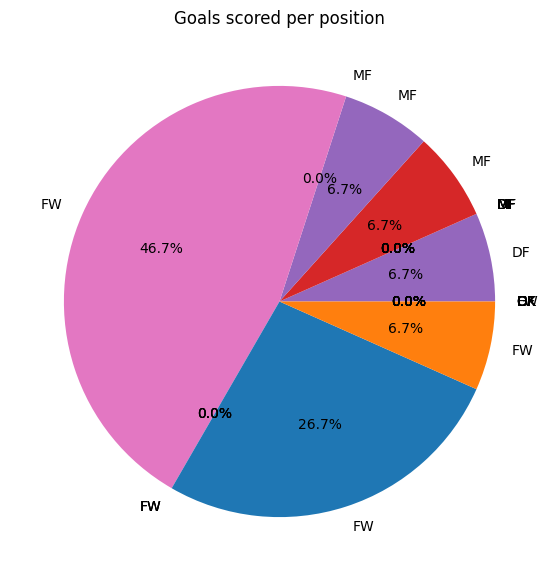

In [43]:
goals_scored = dataframe['Goals Scored ']
position = dataframe['Position']

figure = plt.figure(figsize=(10, 7))
plt.pie(goals_scored, labels=position, autopct='%1.1f%%')
plt.title('Goals scored per position')
plt.show()

**Plotly**

In [44]:
px.pie(dataframe, values='Goals Scored ', names='Position', title='Goals scored per position')